In [1]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import gym
from lunar_lander import LunarLander2QModel
from maslourl.trackers.file_logger import FileLogger

In [2]:
replay_buffer_size = 1000000
training_batch_size = 64
max_episodes = 5000
max_steps = 3000
target_network_replace_frequency_steps = 100
model_backup_frequency_episodes = 25
starting_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay = 0.996
discount_factor = 0.99

In [3]:
env = gym.make('LunarLander-v2')

In [4]:
agent = LunarLander2QModel(env, replay_buffer_size=replay_buffer_size)

In [5]:
agent.summary()

Observation space: Box([-inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf], (8,), float32)
Action space: Discrete(4)
Model: "LunarLander"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 69,124
Trainable params: 69,124
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
agent.train(episodes=max_episodes, max_steps_for_episode=max_steps, starting_epsilon=starting_epsilon, epsilon_min=minimum_epsilon,
            epsilon_decay=epsilon_decay, target_network_replace_frequency_steps=target_network_replace_frequency_steps,
            training_batch_size=training_batch_size,
            discount_factor=discount_factor, model_backup_frequency_episodes= model_backup_frequency_episodes,path_to_back_up="./back_ups_phil/",
            episodes_for_average_tracking=50, file_logger=FileLogger("./logging/log_phil.csv"))

episode 0 finished in 80 steps with reward -90.30. Average reward over last 50: -90.30 And took: 7.41 seconds. 
episode 1 finished in 71 steps with reward -73.27. Average reward over last 50: -81.79 And took: 16.09 seconds. 
episode 2 finished in 101 steps with reward -202.06. Average reward over last 50: -121.88 And took: 22.82 seconds. 
episode 3 finished in 211 steps with reward -252.77. Average reward over last 50: -154.60 And took: 47.14 seconds. 
episode 4 finished in 124 steps with reward -76.56. Average reward over last 50: -138.99 And took: 27.85 seconds. 
episode 5 finished in 109 steps with reward -113.58. Average reward over last 50: -134.76 And took: 24.52 seconds. 
episode 6 finished in 213 steps with reward -90.83. Average reward over last 50: -128.48 And took: 47.57 seconds. 
episode 7 finished in 164 steps with reward -93.36. Average reward over last 50: -124.09 And took: 36.67 seconds. 
episode 8 finished in 184 steps with reward -87.92. Average reward over last 50: -

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000002A016284C10>
Traceback (most recent call last):
  File "C:\Users\leff0\anaconda3\envs\ml\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 

KeyboardInterrupt



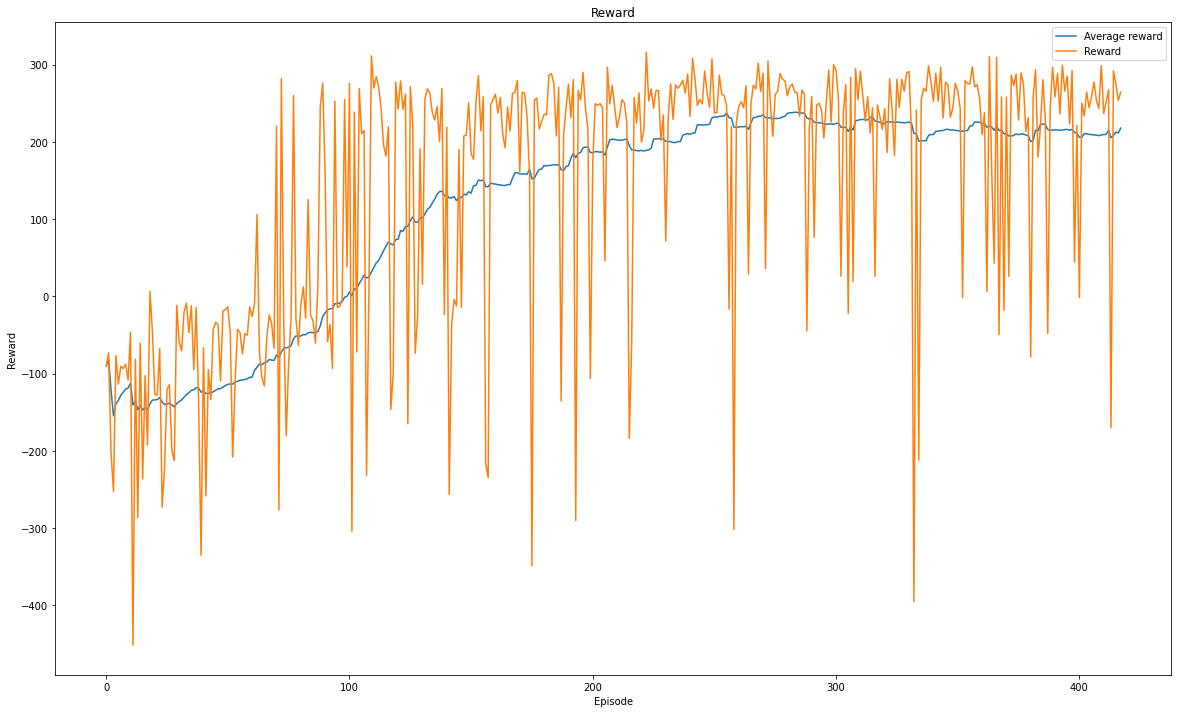

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./logging/log_phil.csv", sep=';')
plt.figure(figsize=(20,12))

plt.plot(data['average'])
plt.plot(data['reward'])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(['Average reward', 'Reward'], loc='upper right')
plt.title('Reward')
plt.show()

In [13]:
agent.test(100,1000, visualize=False)

Starting episode 0
episode 0 finished in 305 steps with reward 264.24. And took: 14.95 seconds. 
Starting episode 1
episode 1 finished in 306 steps with reward 240.83. And took: 13.73 seconds. 
Starting episode 2
episode 2 finished in 291 steps with reward 253.20. And took: 13.34 seconds. 
Starting episode 3
episode 3 finished in 567 steps with reward 242.70. And took: 26.43 seconds. 
Starting episode 4
episode 4 finished in 506 steps with reward 205.38. And took: 23.89 seconds. 
Starting episode 5
episode 5 finished in 271 steps with reward 260.05. And took: 12.65 seconds. 
Starting episode 6
episode 6 finished in 362 steps with reward 294.62. And took: 16.18 seconds. 
Starting episode 7
episode 7 finished in 376 steps with reward 253.04. And took: 16.40 seconds. 
Starting episode 8
episode 8 finished in 305 steps with reward 257.15. And took: 13.62 seconds. 
Starting episode 9
episode 9 finished in 450 steps with reward 230.73. And took: 19.72 seconds. 
Starting episode 10
episode 10

In [15]:
agent.test(2,1000, visualize=True)

Starting episode 0
episode 0 finished in 500 steps with reward 224.59. And took: 40.72 seconds. 
Starting episode 1
episode 1 finished in 314 steps with reward 247.58. And took: 19.49 seconds. 
Average reward  236.08590307468586


In [12]:
agent.save_model("model/ddq_200p.h5")